In [2]:
!pip install pingouin -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

import pingouin as pg

In [4]:
post_likes = pd.read_csv('/content/drive/MyDrive/Karpov_Courses/data/post_likes.csv')

In [ ]:
post_likes.head()

<Axes: xlabel='button', ylabel='likes'>

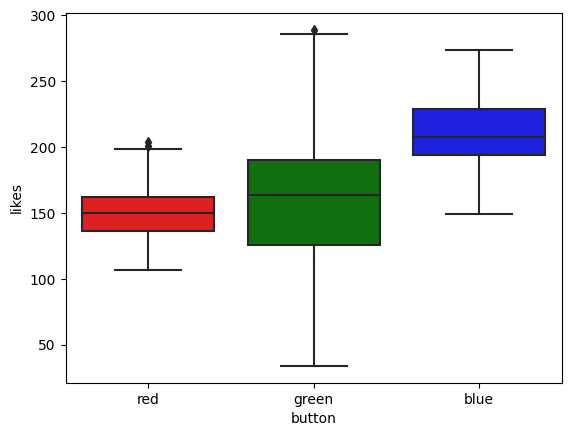

In [7]:
sns.boxplot(data=post_likes, x='button', y='likes', palette=['r', 'g', 'b'])

<Axes: xlabel='button', ylabel='likes'>

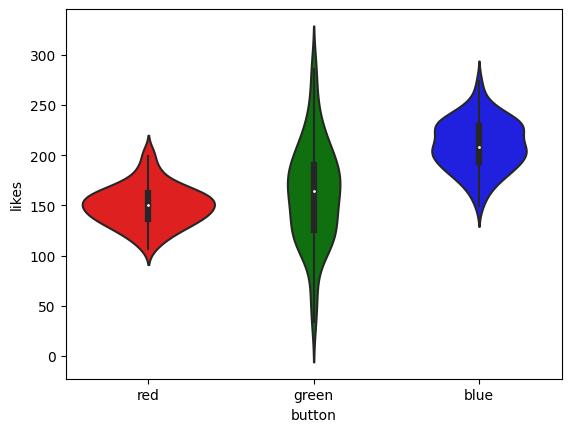

In [8]:
sns.violinplot(data=post_likes, x='button', y='likes', palette=['r', 'g', 'b'])

In [10]:
red = post_likes.query('button == "red"')['likes']
green = post_likes.query('button == "green"')['likes']
blue = post_likes.query('button == "blue"')['likes']

In [12]:
ss.f_oneway(red, green, blue)

F_onewayResult(statistic=85.99631112614011, pvalue=3.4370045810218544e-30)

In [13]:
model = smf.ols(formula = "likes ~ C(button)", data = post_likes).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(button),2.0,201960.286667,100980.143333,85.996311,3.437005e-30
Residual,297.0,348748.710000,1174.238081,NaN,NaN


In [14]:
pg.anova(data=post_likes, dv='likes', between='button')

,Source,ddof1,ddof2,F,p-unc,np2
0,button,2,297,85.996311,3.437005e-30,0.366728


<Axes: xlabel='button', ylabel='likes'>

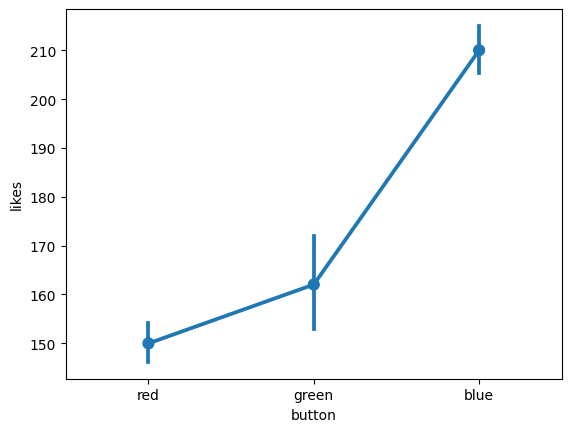

In [15]:
sns.pointplot(data=post_likes, x='button', y='likes')

In [16]:
print(ss.shapiro(red))
print(ss.shapiro(blue))
print(ss.shapiro(green))

ShapiroResult(statistic=0.988104522228241, pvalue=0.515945315361023)
ShapiroResult(statistic=0.9937934279441833, pvalue=0.9309807419776917)
ShapiroResult(statistic=0.988717794418335, pvalue=0.5625351667404175)


In [17]:
print(ss.normaltest(red))
print(ss.normaltest(blue))
print(ss.normaltest(green))

NormaltestResult(statistic=1.834358590753997, pvalue=0.3996447324611219)
NormaltestResult(statistic=0.4606964500747045, pvalue=0.7942569741771747)
NormaltestResult(statistic=0.6727062715909409, pvalue=0.7143707913703767)


In [18]:
pg.normality(data=post_likes, dv='likes', group='button', method='normaltest')

,W,pval,normal
button,,,
red,1.834359,0.399645,True
green,0.672706,0.714371,True
blue,0.460696,0.794257,True


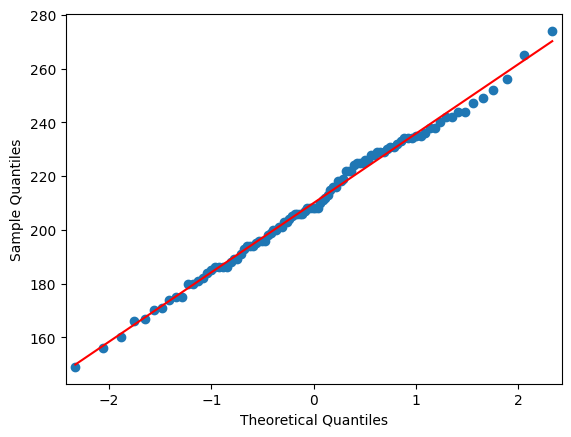

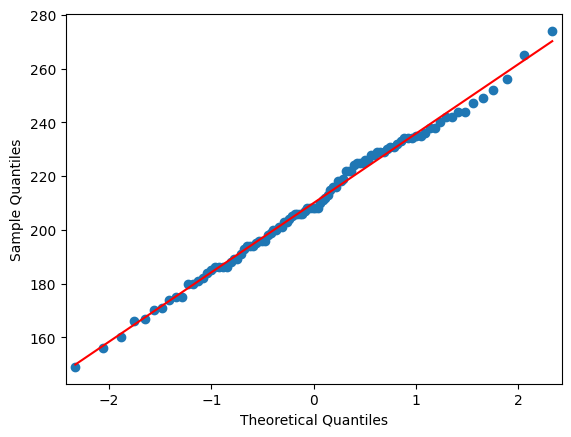

In [19]:
sm.qqplot(blue, line='r')

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

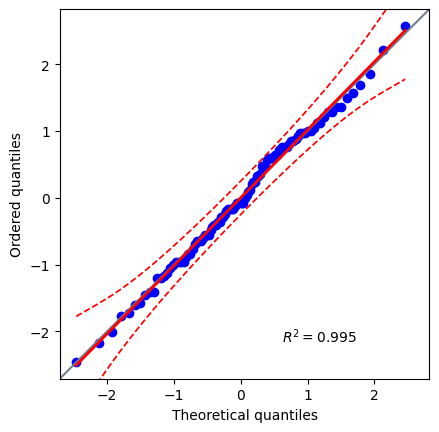

In [20]:
pg.qqplot(blue)

In [21]:
ss.levene(red, green, blue)

LeveneResult(statistic=35.214282435572876, pvalue=1.8886636651084242e-14)

In [22]:
pg.homoscedasticity(data=post_likes, dv='likes', group='button')

,W,pval,equal_var
levene,35.214282,1.888664e-14,False


In [23]:
pg.welch_anova(data=post_likes, dv='likes', between='button')

,Source,ddof1,ddof2,F,p-unc,np2
0,button,2,182.958104,177.856578,1.255660e-43,0.366728


### Множественные сравнения

In [24]:
from scipy.special import comb

In [25]:
comb(10, 2)

45.0

In [26]:
1 - 0.95 **45

0.9005597430129078

In [28]:
pg.pairwise_tests(data=post_likes, dv='likes', between='button')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,button,blue,green,False,True,8.591097,198.0,two-sided,2.561866e-15,2.025e+12,1.210357
1,button,blue,red,False,True,18.769214,198.0,two-sided,7.952330e-46,1.582e+42,2.644301
2,button,green,red,False,True,2.240189,198.0,two-sided,2.619001e-02,1.583,0.315609


In [29]:
pg.pairwise_tests(data=post_likes, dv='likes', between='button', padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,button,blue,green,False,True,8.591097,198.0,two-sided,2.561866e-15,7.685599e-15,bonf,2.025e+12,1.210357
1,button,blue,red,False,True,18.769214,198.0,two-sided,7.952330e-46,2.385699e-45,bonf,1.582e+42,2.644301
2,button,green,red,False,True,2.240189,198.0,two-sided,2.619001e-02,7.857004e-02,bonf,1.583,0.315609


In [30]:
pg.pairwise_tests(data=post_likes, dv='likes', between='button', padjust='holm')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,button,blue,green,False,True,8.591097,198.0,two-sided,2.561866e-15,5.123733e-15,holm,2.025e+12,1.210357
1,button,blue,red,False,True,18.769214,198.0,two-sided,7.952330e-46,2.385699e-45,holm,1.582e+42,2.644301
2,button,green,red,False,True,2.240189,198.0,two-sided,2.619001e-02,2.619001e-02,holm,1.583,0.315609


In [31]:
pg.pairwise_tukey(data=post_likes, dv='likes', between='button')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,blue,green,210.03,162.02,48.01,4.846108,9.906919,1.143530e-14,1.210357
1,blue,red,210.03,149.96,60.07,4.846108,12.395514,1.143530e-14,2.644301
2,green,red,162.02,149.96,12.06,4.846108,2.488595,3.557351e-02,0.315609


In [32]:
pg.pairwise_gameshowell(data=post_likes, dv='likes', between='button')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,blue,green,210.03,162.02,48.01,5.588343,8.591097,145.583529,2.242651e-14,1.210357
1,blue,red,210.03,149.96,60.07,3.200454,18.769214,188.902921,0.000000e+00,2.644301
2,green,red,162.02,149.96,12.06,5.383475,2.240189,129.889834,6.830241e-02,0.315609


In [34]:
pairwise_tukeyhsd(post_likes['likes'], post_likes['button']).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
blue,green,-48.01,0.0,-59.4251,-36.5949,True
blue,red,-60.07,0.0,-71.4851,-48.6549,True
green,red,-12.06,0.0356,-23.4751,-0.6449,True


# Многофакторный дисперсионный анализ

In [43]:
ads_clicks = pd.read_csv('/content/drive/MyDrive/Karpov_Courses/data/ads_clicks.csv')

In [44]:
ads_clicks.head()

,id,ads,age_group,clicks
0,S001,classic,18-27,40
1,S002,classic,18-27,22
2,S003,classic,18-27,41
3,S004,classic,18-27,35
4,S005,classic,18-27,39


In [45]:
model_main = smf.ols('clicks ~C(ads) + C(age_group)', data=ads_clicks).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(button),2.0,201960.286667,100980.143333,85.996311,3.437005e-30
Residual,297.0,348748.710000,1174.238081,NaN,NaN


<Axes: xlabel='ads', ylabel='clicks'>

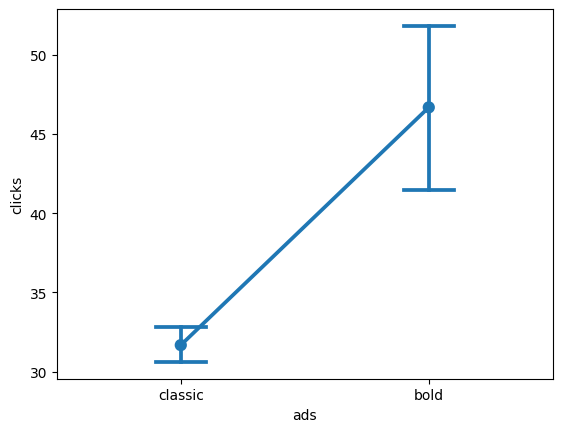

In [46]:
sns.pointplot(data=ads_clicks, x='ads', y='clicks', capsize=0.2)

<Axes: xlabel='age_group', ylabel='clicks'>

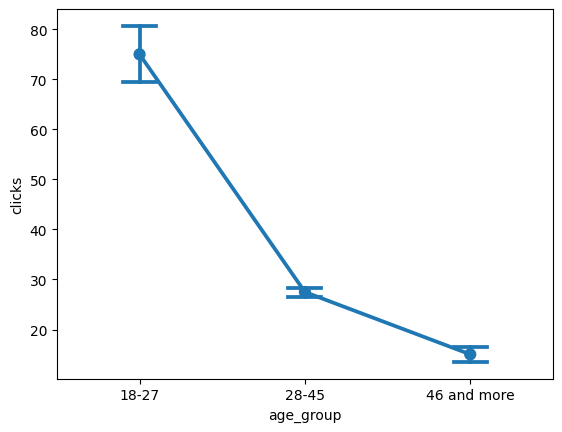

In [47]:
sns.pointplot(data=ads_clicks, x='age_group', y='clicks', capsize=0.2)

In [49]:
model_interact = smf.ols('clicks ~C(ads)*C(age_group)', data=ads_clicks).fit()
anova_lm(model_interact)

,df,sum_sq,mean_sq,F,PR(>F)
C(ads),1.0,33735.001667,33735.001667,336.722432,6.446773e-60
C(age_group),2.0,400495.163333,200247.581667,1998.750536,1.636934e-264
C(ads):C(age_group),2.0,232685.043333,116342.521667,1161.260853,5.618312e-206
Residual,594.0,59510.710000,100.186380,NaN,NaN


<Axes: xlabel='ads', ylabel='clicks'>

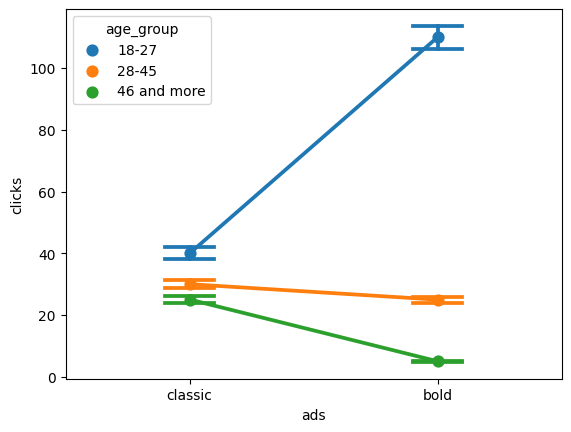

In [51]:
sns.pointplot(data=ads_clicks, x='ads', y='clicks', hue='age_group', capsize=0.2)

In [52]:
pg.anova(data=ads_clicks, dv='clicks', between=['ads', 'age_group'])

,Source,SS,DF,MS,F,p-unc,np2
0,ads,33735.001667,1,33735.001667,336.722432,6.446773e-60,0.361786
1,age_group,400495.163333,2,200247.581667,1998.750536,1.636934e-264,0.870631
2,ads * age_group,232685.043333,2,116342.521667,1161.260853,5.618312e-206,0.796333
3,Residual,59510.710000,594,100.186380,NaN,NaN,NaN


In [53]:
pg.anova(data=ads_clicks, dv='clicks', between=['ads', 'age_group'], effsize='n2')

,Source,SS,DF,MS,F,p-unc,n2
0,ads,33735.001667,1,33735.001667,336.722432,6.446773e-60,0.046440
1,age_group,400495.163333,2,200247.581667,1998.750536,1.636934e-264,0.551323
2,ads * age_group,232685.043333,2,116342.521667,1161.260853,5.618312e-206,0.320315
3,Residual,59510.710000,594,100.186380,NaN,NaN,NaN


In [56]:
dat_unbalanced = ads_clicks[ads_clicks['id'] != "S001"]

In [57]:
dat_unbalanced.head()

,id,ads,age_group,clicks
1,S002,classic,18-27,22
2,S003,classic,18-27,41
3,S004,classic,18-27,35
4,S005,classic,18-27,39
5,S006,classic,18-27,35


In [58]:
pg.anova(data=dat_unbalanced, dv='clicks', between=['ads', 'age_group'], ss_type=1)

,Source,SS,DF,MS,F,p-unc,np2
0,ads,33803.779316,1.0,33803.779316,336.840901,6.486330e-60,0.362256
1,age_group,401187.127208,2.0,200593.563604,1998.833209,2.914479e-264,0.870825
2,ads * age_group,231923.625646,2.0,115961.812823,1155.512262,2.698570e-205,0.795801
3,Residual,59510.709899,593.0,100.355329,NaN,NaN,NaN


In [59]:
pg.anova(data=dat_unbalanced, dv='clicks', between=['age_group', 'ads'], ss_type=1)

,Source,SS,DF,MS,F,p-unc,np2
0,age_group,401725.642849,2.0,200862.821425,2001.516253,2.061246e-264,0.870976
1,ads,33265.263676,1.0,33265.263676,331.474812,3.626438e-59,0.358555
2,age_group * ads,231923.625646,2.0,115961.812823,1155.512262,2.698570e-205,0.795801
3,Residual,59510.709899,593.0,100.355329,NaN,NaN,NaN
